In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import preprocessing  
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
## Dummies for categorical Data

In [4]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [5]:
# Divide Taxable income into Risky and Good

In [6]:
df["TaxInc"]=pd.cut(df["Taxable.Income"],bins=[10002,30000,99620],labels=["Risky", "Good"])

In [7]:
df['TaxInc']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [8]:
df=pd.get_dummies(df,columns=["TaxInc"],drop_first=True)

In [9]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


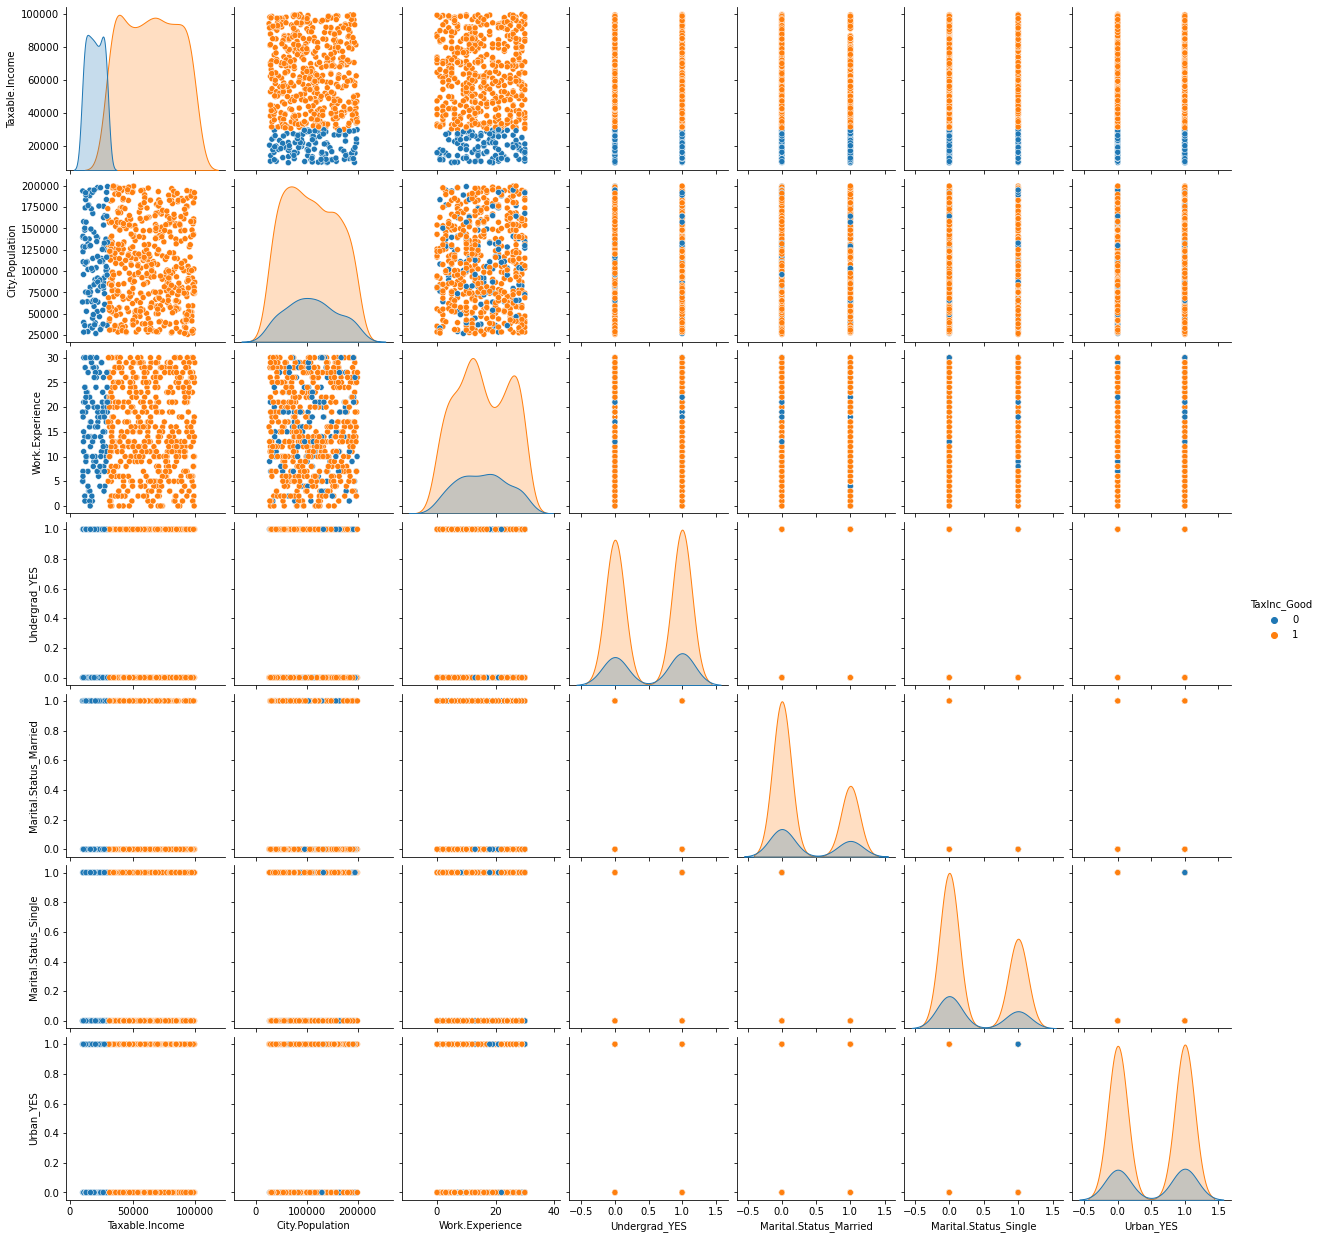

In [10]:
sns.pairplot(data=df, hue='TaxInc_Good')

In [11]:
## Normalize data

In [12]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
df_norm = norm_func(df.iloc[:,1:])
df_norm

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [14]:
## Features

In [15]:
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [18]:
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [19]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [20]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype==object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [21]:
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [22]:
colnames=list(df.columns)
predictors=colnames[0:5]
target=colnames[5]

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [24]:
from sklearn.ensemble import RandomForestClassifier as RF

In [25]:
model=RF(n_jobs=3,n_estimators=15, oob_score=True, criterion="entropy")
model.fit(x_train,y_train)

D:\bin\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [26]:
model.oob_score_

0.5375

In [27]:
model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=365516514),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=719972159),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=392183087),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=706978419),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1076563269),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1671798774),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=993881022),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=57319673),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
             

In [28]:
predict=model.predict(x_train)

In [29]:
accuracy=accuracy_score(y_train,predict)
accuracy

0.98125

In [30]:
np.mean(predict==y_train)

0.98125

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm=confusion_matrix(y_train,predict)
cm

array([[234,   4],
       [  5, 237]], dtype=int64)

In [33]:
## Predict
pred_test=model.predict(x_test)

In [34]:
acc_test=accuracy_score(y_test,pred_test)
acc_test

0.49166666666666664

In [40]:
## Decision Tree

In [41]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

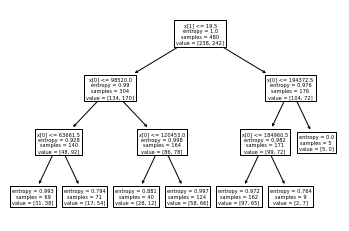

In [43]:
tree.plot_tree(model)
plt.show()

In [45]:
cols=list(df.columns)
cols

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

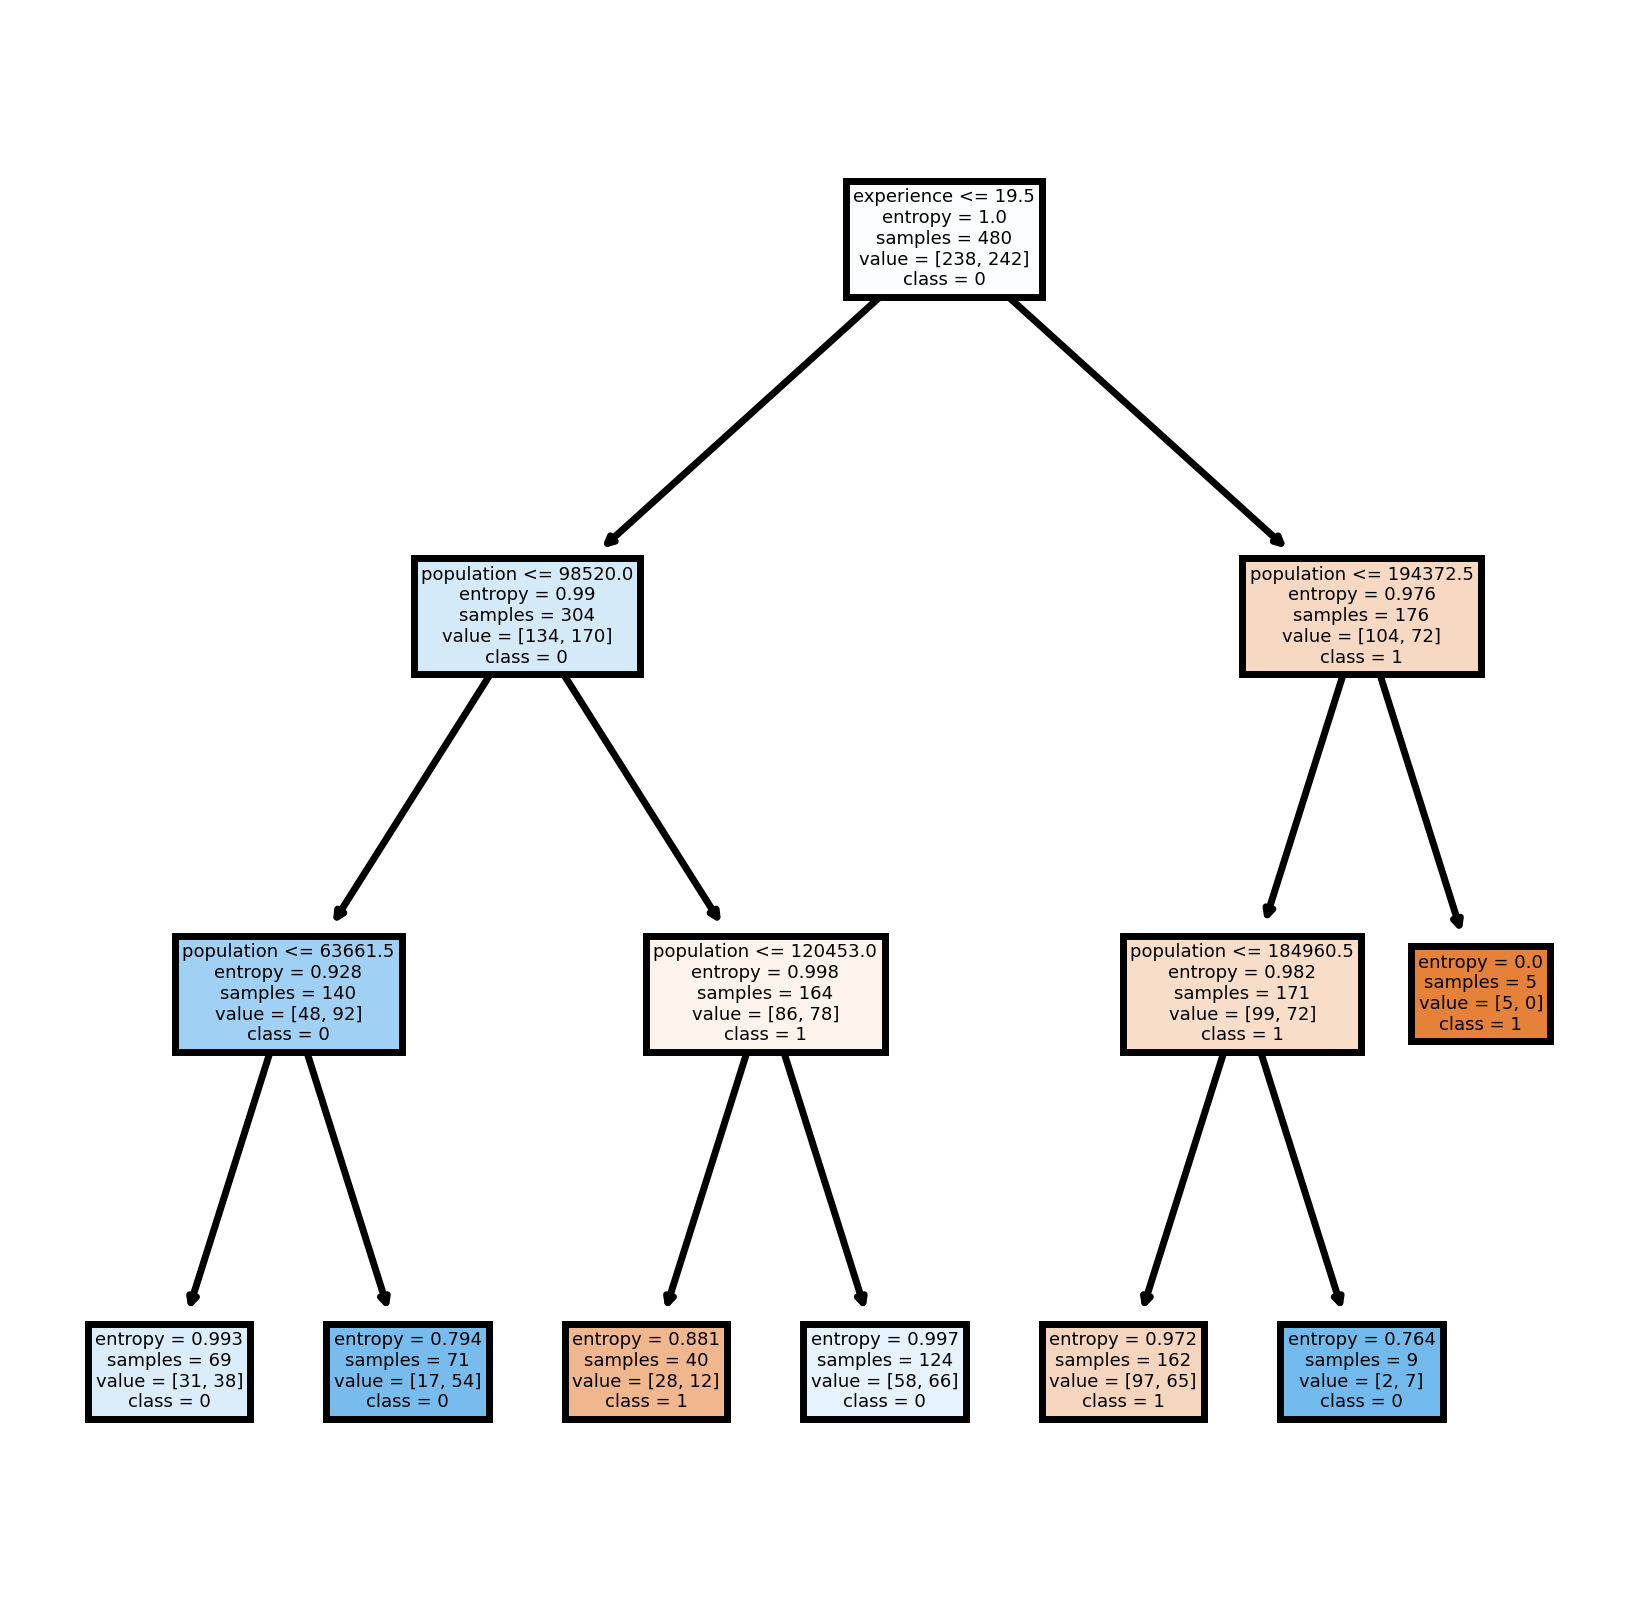

In [47]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [48]:
pred=model.predict(x_test) # predicting on test data set 
pd.Series(pred)

0      0
1      1
2      1
3      1
4      1
      ..
115    1
116    1
117    0
118    1
119    1
Length: 120, dtype: uint8

In [50]:
pd.crosstab(y_test,pred)

col_0,0,1
Urban_YES,,
0,23,37
1,25,35


In [51]:
np.mean(pred==y_test)

0.48333333333333334

In [52]:
## CART

In [53]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini', max_depth=3)

In [54]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
preds=model.predict(x_test)
np.mean(pred==y_test)

0.48333333333333334

In [57]:
## DT Reg Example

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [73]:
model=DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [74]:
model.score(X_test,y_test)

-0.9393656716417913